In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def redistribute_force(F, L, alpha, F_thr, neighborhood='moore'):
    # Create a copy of the forces to store the new values
    F_new = np.copy(F)
    # List of active sites
    active_sites = []

    # Find active sites
    for i in range(L):
        for j in range(L):
            if F[i, j] >= F_thr:
                active_sites.append((i, j))

    # Redistribute forces from active sites
    for site in active_sites:
        i, j = site
        force_to_redistribute = F[i, j]

        # Define the neighborhood for force redistribution
        if neighborhood == 'moore':
            neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1),
                         (i-1, j-1), (i-1, j+1), (i+1, j-1), (i+1, j+1)]
        else:  # von Neumann neighborhood
            neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]

        # count no of neighbors 
        neighbors_count = 0    
        for n in neighbors:
            ni, nj = n
            if 0 <= ni < L and 0 <= nj < L:
                neighbors_count += 1
        
        # Redistribute the force to the neighbors
        for n in neighbors:
            ni, nj = n
            if 0 <= ni < L and 0 <= nj < L:
                F_new[ni, nj] += (alpha * force_to_redistribute)/neighbors_count

        # Set the force of the active site to zero
        F_new[i, j] = 1

    return F_new, active_sites

def simulate_ca(L, alpha, F_thr, n_additions, neighborhood='moore'):
    # Initialize the grid with random forces
    F = np.random.rand(L, L) * F_thr
    initial_state = np.copy(F)

    active = True
    active_sites_count = 0
    active_sites_array = []
    while active:
        # Redistribute forces and get list of active sites
        F, active_sites = redistribute_force(F, L, alpha, F_thr, neighborhood)
        # If there are no active sites, break the loop
        active = len(active_sites) > 0
        active_sites_count += len(active_sites)

        if not active and n_additions > 0:
            # Locate site with the block closest to slip
            i, j = np.unravel_index(np.argmin(F_thr - F), F.shape)
            # Add the difference to all sites
            F += (F_thr - F[i, j])
            n_additions -= 1
            active_sites_array.append(active_sites_count)
            active_sites_count = 0
            active = True

    return initial_state, F, active_sites_array

def visualize_states(initial_state, final_state, title='Cellular Automata States'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Initial state visualization
    ax1 = axes[0]
    im1 = ax1.imshow(initial_state, cmap='viridis', interpolation='nearest')
    ax1.set_title('Initial State')
    fig.colorbar(im1, ax=ax1, orientation='vertical')

    # Final state visualization
    ax2 = axes[1]
    im2 = ax2.imshow(final_state, cmap='viridis', interpolation='nearest')
    ax2.set_title('Final State')
    fig.colorbar(im2, ax=ax2, orientation='vertical')

    # Overall title and show
    plt.suptitle(title)
    plt.show()


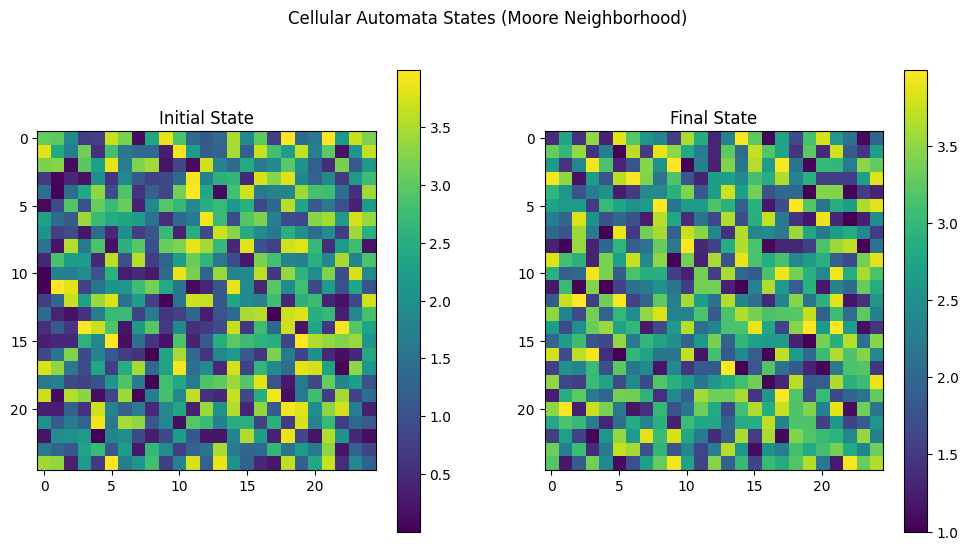

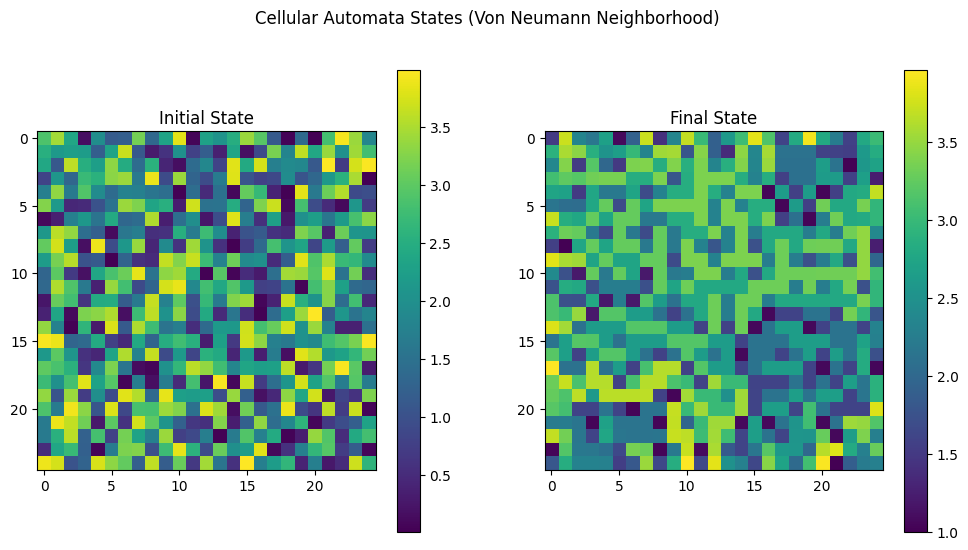

In [3]:
# Parameters
L = 25  # Size of the lattice
alpha = 0.5  # Coupling constant
F_thr = 4.0  # Threshold force
n_additions = 10000 # Number of additions of force to the system

# Run the simulation for Moore neighborhood
initial_state_moore, final_state_moore, active_sites_moore = simulate_ca(L, alpha, F_thr, n_additions, neighborhood='moore')

# Visualize the initial and final states for Moore neighborhood
visualize_states(initial_state_moore, final_state_moore, title='Cellular Automata States (Moore Neighborhood)')

# Run the simulation for Von Neumann neighborhood
initial_state_von, final_state_von, active_sites_von = simulate_ca(L, alpha, F_thr, n_additions, neighborhood='von_neumann')

# Visualize the initial and final states for Von Neumann neighborhood
visualize_states(initial_state_von, final_state_von, title='Cellular Automata States (Von Neumann Neighborhood)')

C:\Users\sunny\AppData\Local\Temp\ipykernel_19948\630107832.py:15: RuntimeWarning: divide by zero encountered in power
  return a * np.power(x, -b)
C:\Users\sunny\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


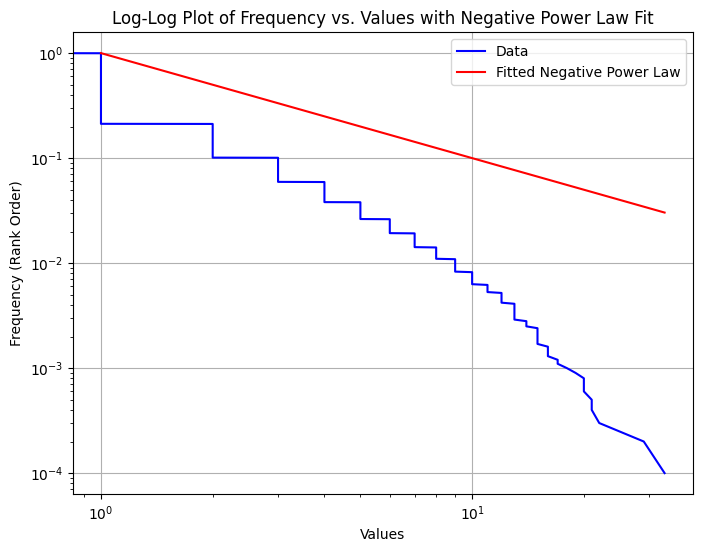

In [4]:
# Generate some data with a negative power law distribution
# For demonstration, let's create a sample array with a negative exponent

values = active_sites_moore  # 'a' is the exponent parameter

# Calculate the frequencies of each value
values_sorted = np.sort(values)
frequencies = np.arange(1, len(values_sorted) + 1) / len(values_sorted)

# Inverse the frequencies to get the ranks
ranks = frequencies[::-1]

# Define a negative power law function
def neg_power_law(x, a, b):
    return a * np.power(x, -b)

# Fit the negative power law to the data using curve_fit
params, _ = curve_fit(neg_power_law, values_sorted, ranks)

# Generate fitted values using the parameters obtained from curve_fit
fitted_ranks = neg_power_law(values_sorted, *params)

# Make a log-log plot of the data and the fitted curve
plt.figure(figsize=(8, 6))
plt.loglog(values_sorted, ranks, color='b', label='Data')
plt.loglog(values_sorted, fitted_ranks, 'r-', label='Fitted Negative Power Law')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency (Rank Order)')
plt.title('Log-Log Plot of Frequency vs. Values with Negative Power Law Fit')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()




Counter({1: 6050, 2: 1533, 3: 702, 5: 235, 6: 210, 4: 167, 23: 117, 8: 72, 18: 68, 12: 61, 7: 54, 9: 53, 59: 50, 19: 48, 11: 47, 10: 44, 51: 38, 55: 29, 26: 24, 22: 21, 39: 21, 14: 18, 90: 18, 13: 17, 45: 17, 20: 16, 92: 15, 16: 14, 15: 13, 43: 13, 28: 12, 73: 12, 17: 11, 72: 11, 75: 10, 31: 9, 76: 9, 63: 9, 30: 8, 29: 8, 25: 8, 24: 7, 35: 7, 32: 7, 27: 5, 37: 5, 33: 5, 48: 5, 44: 5, 58: 5, 50: 4, 41: 4, 21: 4, 57: 4, 47: 3, 34: 3, 56: 3, 60: 3, 46: 2, 38: 2, 49: 2, 54: 2, 62: 2, 66: 2, 91: 2, 78: 2, 42: 2, 0: 1, 36: 1, 40: 1, 68: 1, 85: 1, 71: 1, 64: 1, 79: 1, 80: 1, 87: 1, 74: 1})


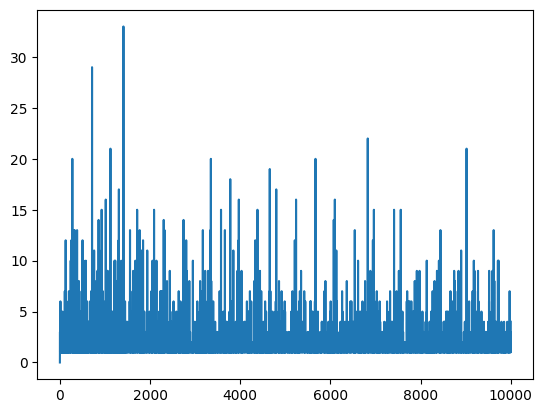

In [5]:
plt.plot(active_sites_moore, label='Moore')
from collections import Counter
occurrences_counter = Counter(active_sites_von)
print(occurrences_counter)

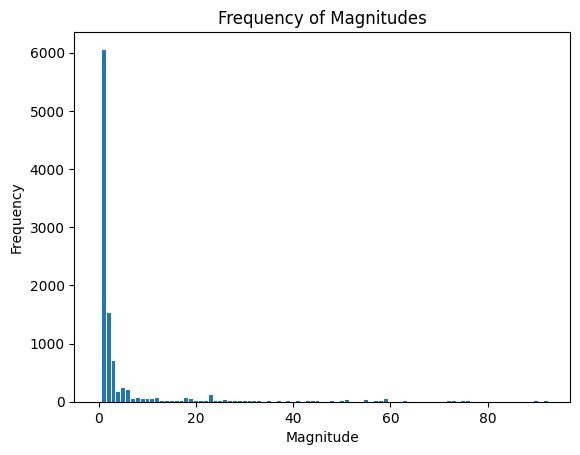

In [6]:
sorted_data = dict(sorted(occurrences_counter.items()))
magnitudes = list(sorted_data.keys())
frequencies = list(sorted_data.values())

plt.bar(magnitudes, frequencies)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Frequency of Magnitudes')
plt.show()

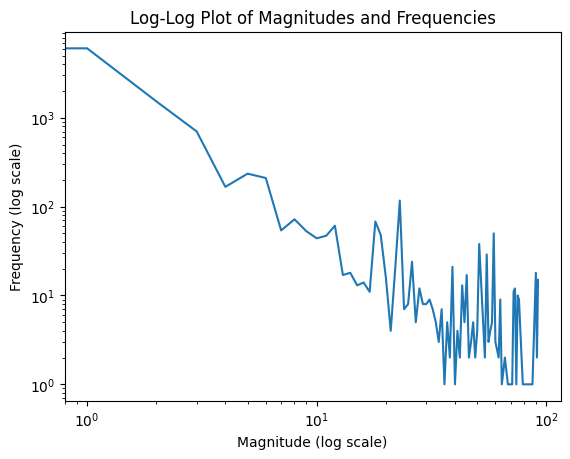

In [7]:
plt.loglog(magnitudes, frequencies)
plt.xlabel('Magnitude (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Log-Log Plot of Magnitudes and Frequencies')
plt.show()

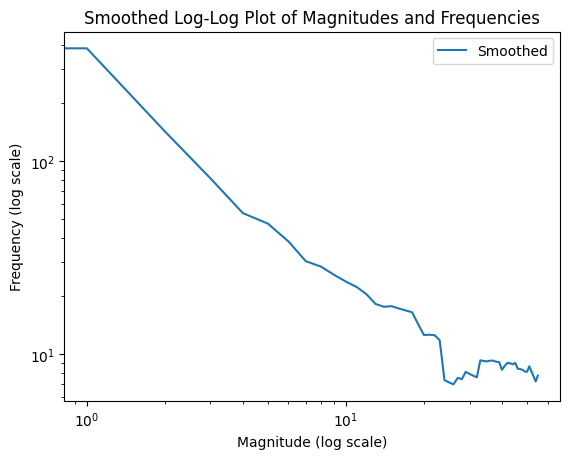

In [8]:
window_size = 25
smoothed_frequencies = np.convolve(frequencies, np.ones(window_size) / window_size, mode='valid')

# Plotting log-log
plt.loglog(magnitudes[:len(smoothed_frequencies)], smoothed_frequencies,label='Smoothed')
plt.xlabel('Magnitude (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Smoothed Log-Log Plot of Magnitudes and Frequencies')
plt.legend()
plt.show()

## alpha against L

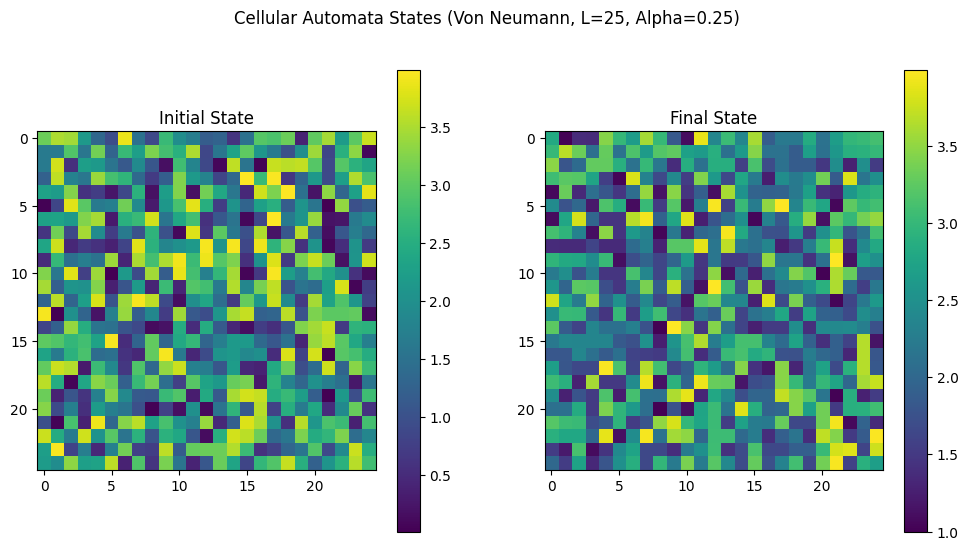

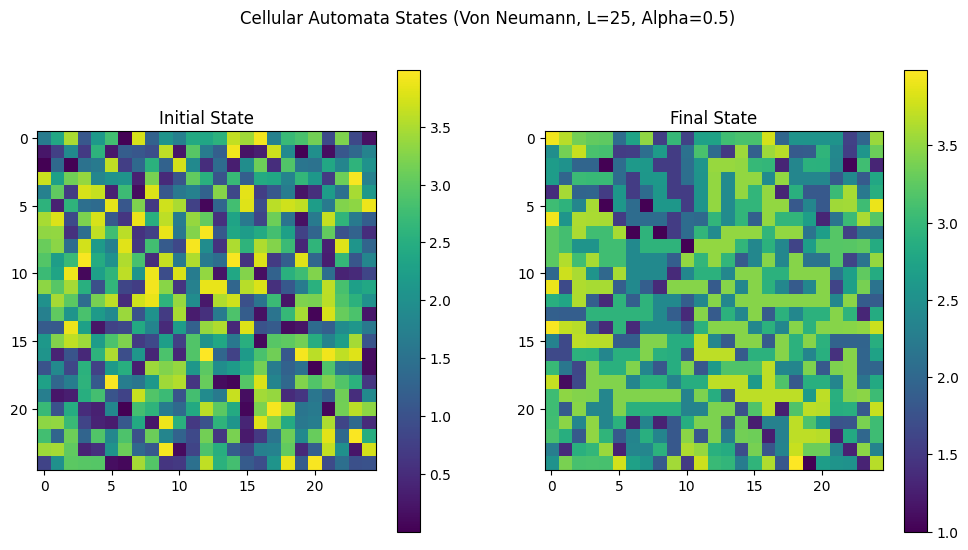

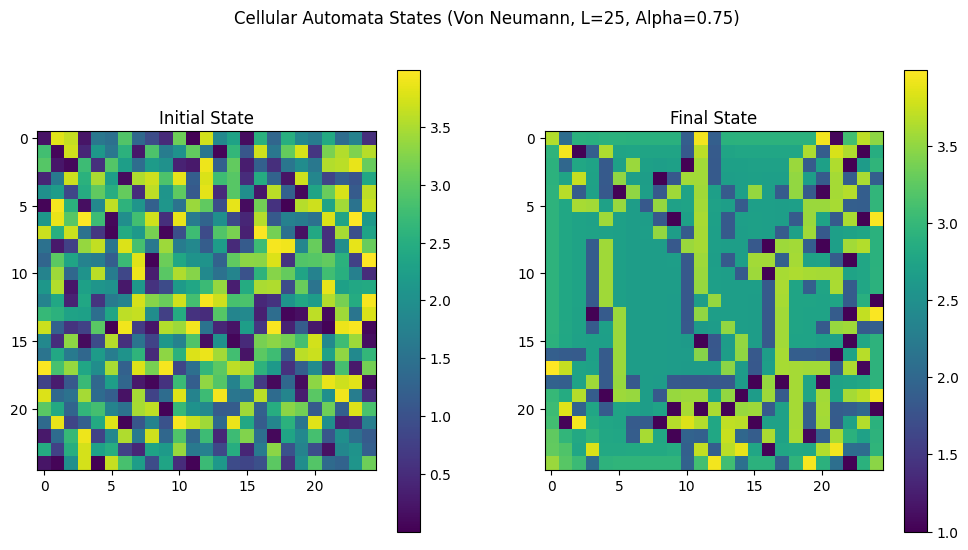

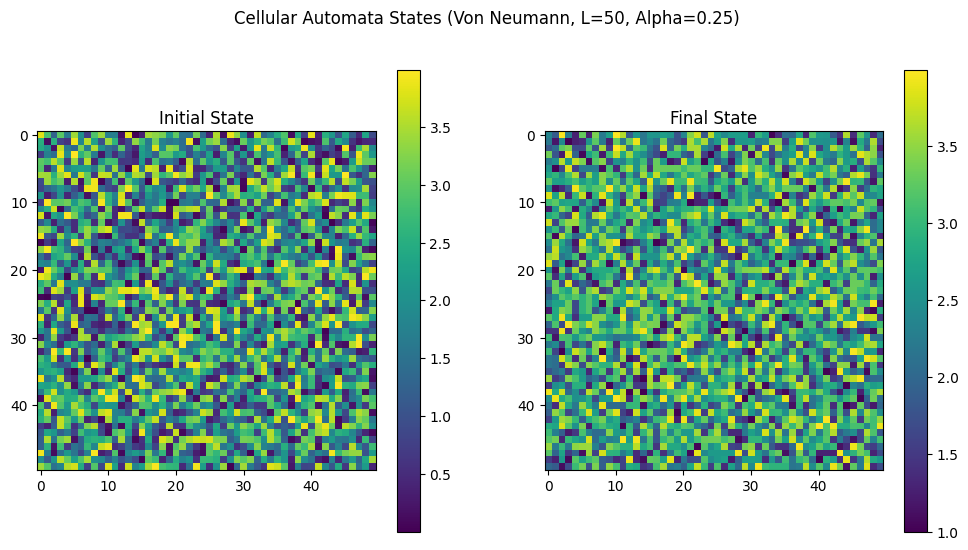

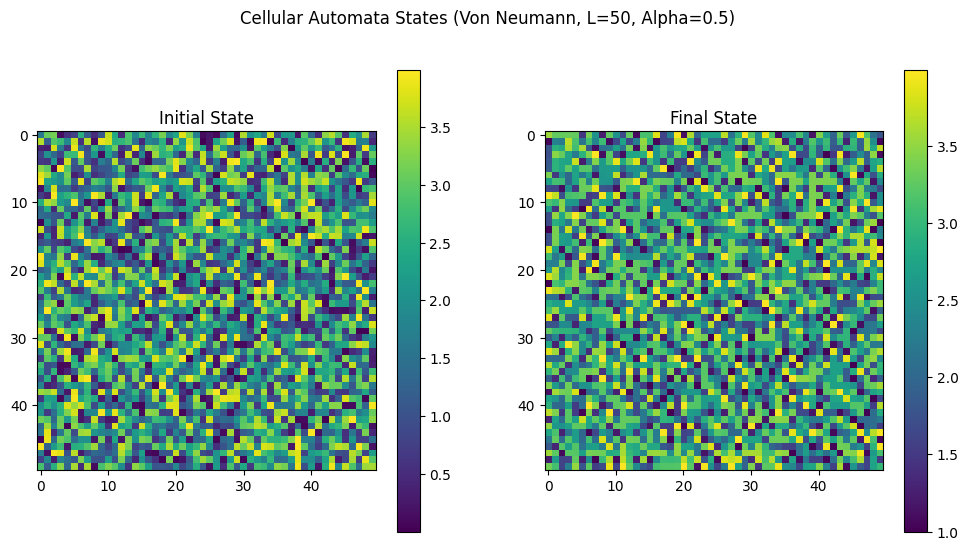

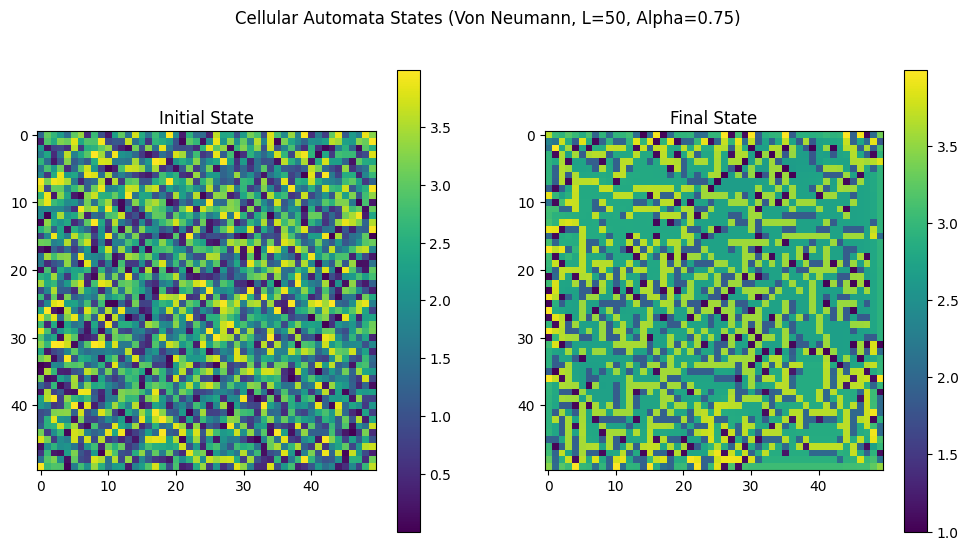

In [9]:
# Parameters
L_values = [25, 50]  # Different sizes of the lattice
alpha_values = [0.25, 0.5, 0.75]  # Different coupling constants
F_thr = 4.0  # Threshold force
n_additions = 10000  # Number of additions of force to the system

sites_moore = []
sites_von = []
for L in L_values:
    for alpha in alpha_values:
        # # Run the simulation for Moore neighborhood
        # initial_state_moore, final_state_moore, active_sites_moore = simulate_ca(L, alpha, F_thr, n_additions, 'moore')
        # sites_moore.append(active_sites_moore)
        # # Visualize the states for Moore neighborhood
        # visualize_states(initial_state_moore, final_state_moore, f'Cellular Automata States (Moore, L={L}, Alpha={alpha})')

        # Run the simulation for Von Neumann neighborhood
        initial_state_von, final_state_von, active_sites_von = simulate_ca(L, alpha, F_thr, n_additions, 'von_neumann')
        sites_von.append(active_sites_von)
        # Visualize the states for Von Neumann neighborhood
        visualize_states(initial_state_von, final_state_von, f'Cellular Automata States (Von Neumann, L={L}, Alpha={alpha})')


Counter({1: 8629, 2: 828, 3: 292, 4: 90, 5: 73, 6: 29, 7: 22, 8: 14, 9: 7, 11: 5, 14: 3, 10: 2, 15: 2, 0: 1, 12: 1, 13: 1, 16: 1})


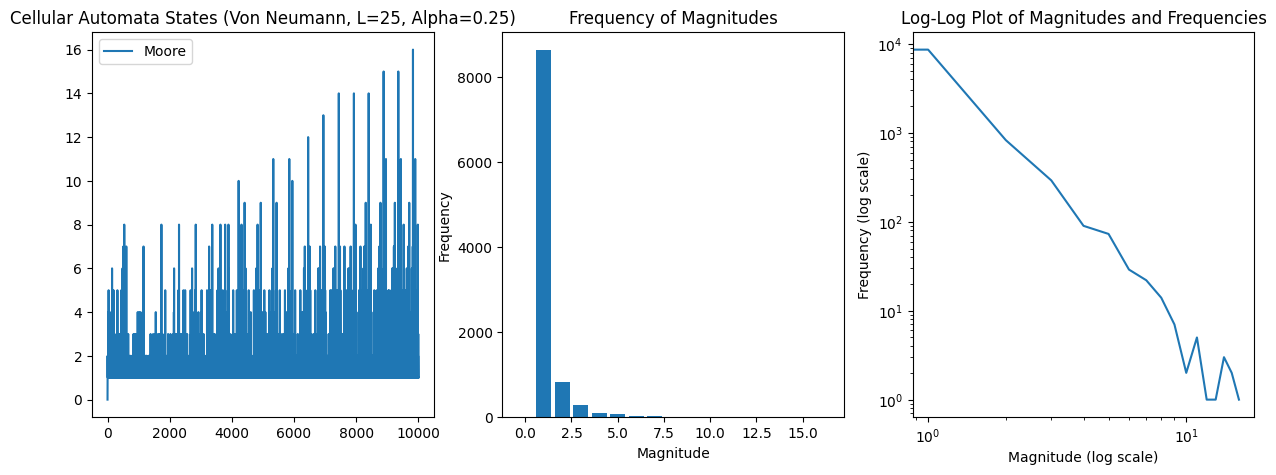

Counter({1: 6212, 2: 1153, 3: 602, 4: 318, 5: 258, 7: 161, 6: 156, 9: 149, 8: 126, 14: 68, 30: 60, 11: 50, 15: 49, 10: 45, 26: 45, 46: 40, 16: 39, 13: 37, 41: 36, 36: 35, 19: 34, 12: 31, 43: 29, 34: 25, 52: 25, 89: 24, 17: 13, 18: 13, 75: 13, 37: 8, 23: 8, 20: 7, 21: 7, 31: 7, 29: 7, 28: 6, 24: 6, 27: 6, 35: 6, 48: 6, 32: 6, 42: 6, 70: 6, 84: 6, 33: 5, 69: 5, 22: 4, 39: 4, 51: 4, 50: 4, 25: 3, 45: 3, 73: 3, 54: 2, 40: 2, 0: 1, 53: 1, 47: 1, 55: 1, 65: 1, 56: 1, 58: 1, 62: 1, 66: 1, 64: 1, 68: 1, 74: 1, 76: 1, 71: 1, 85: 1, 67: 1, 49: 1})


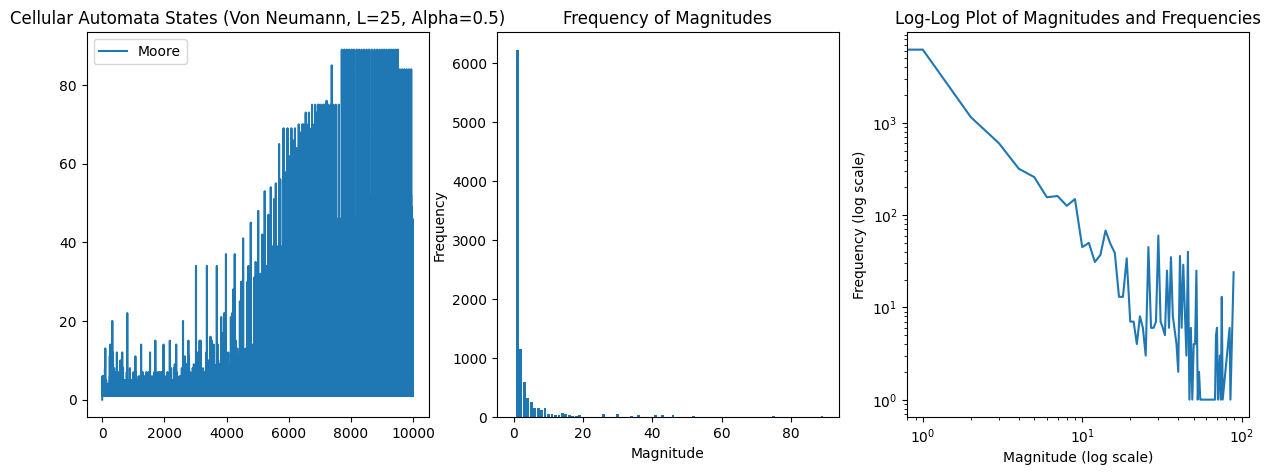

Counter({1: 2581, 2: 1407, 3: 903, 4: 555, 5: 403, 6: 310, 7: 241, 8: 223, 9: 179, 10: 148, 12: 140, 11: 116, 14: 105, 15: 101, 17: 100, 16: 91, 13: 90, 18: 77, 21: 68, 23: 66, 19: 64, 20: 62, 22: 51, 24: 51, 27: 49, 25: 45, 29: 44, 28: 38, 26: 37, 30: 33, 31: 33, 32: 30, 35: 27, 39: 26, 44: 24, 34: 24, 33: 24, 36: 24, 38: 24, 59: 23, 42: 22, 41: 20, 37: 20, 46: 20, 56: 19, 52: 18, 63: 18, 67: 18, 54: 18, 49: 17, 51: 17, 47: 16, 60: 16, 53: 15, 50: 15, 55: 15, 45: 15, 57: 15, 65: 15, 58: 14, 92: 14, 43: 14, 81: 14, 66: 13, 62: 13, 69: 13, 48: 13, 68: 13, 40: 12, 76: 11, 61: 11, 74: 11, 94: 11, 121: 10, 77: 10, 87: 10, 64: 10, 103: 10, 132: 10, 72: 10, 71: 10, 78: 9, 98: 9, 82: 9, 90: 9, 101: 9, 134: 9, 75: 9, 104: 8, 95: 8, 118: 8, 99: 8, 122: 7, 84: 7, 93: 7, 108: 7, 100: 7, 158: 7, 70: 7, 79: 7, 106: 7, 110: 6, 80: 6, 136: 6, 124: 6, 91: 6, 88: 6, 147: 6, 102: 6, 119: 6, 109: 6, 112: 6, 144: 6, 221: 6, 113: 6, 105: 6, 89: 6, 120: 6, 85: 6, 96: 6, 73: 6, 157: 6, 178: 5, 86: 5, 131: 5,

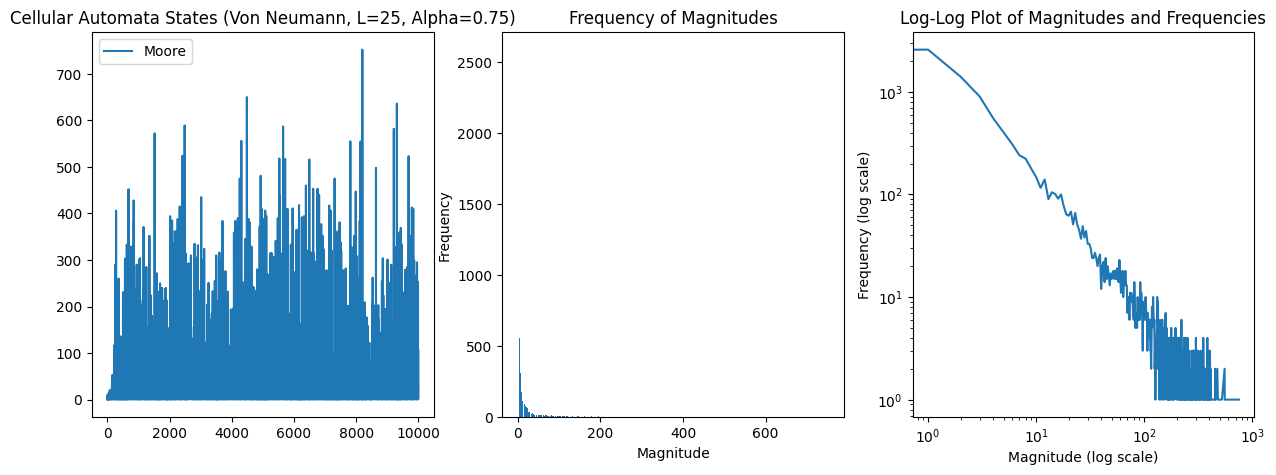

Counter({1: 8891, 2: 758, 3: 233, 4: 61, 5: 27, 6: 12, 7: 8, 8: 5, 9: 2, 0: 1, 14: 1, 11: 1})


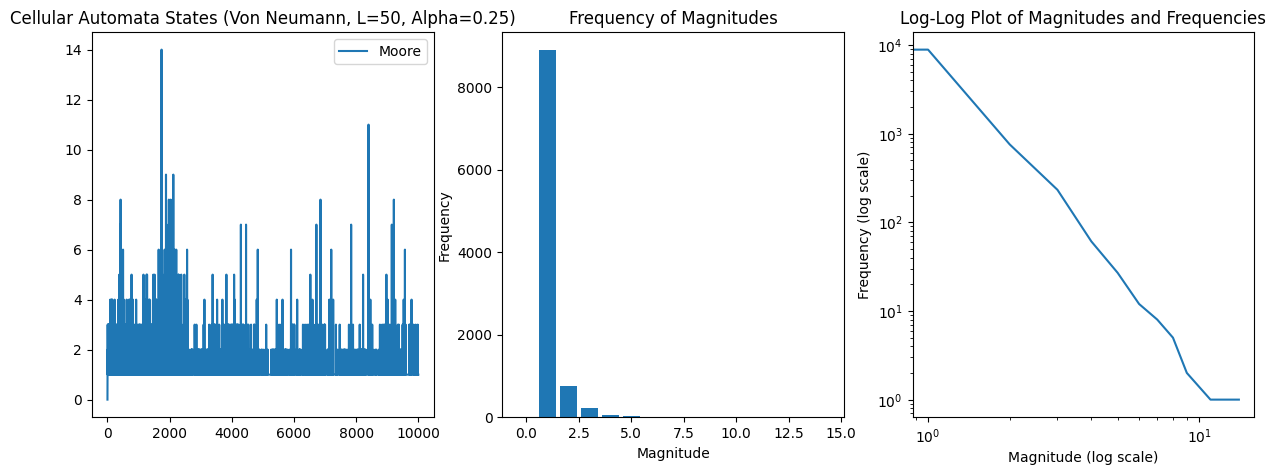

Counter({1: 8220, 2: 942, 3: 349, 4: 160, 5: 101, 6: 61, 7: 45, 8: 35, 10: 19, 9: 19, 11: 12, 12: 10, 13: 7, 15: 6, 14: 5, 0: 1, 17: 1, 16: 1, 27: 1, 23: 1, 22: 1, 20: 1, 21: 1, 25: 1})


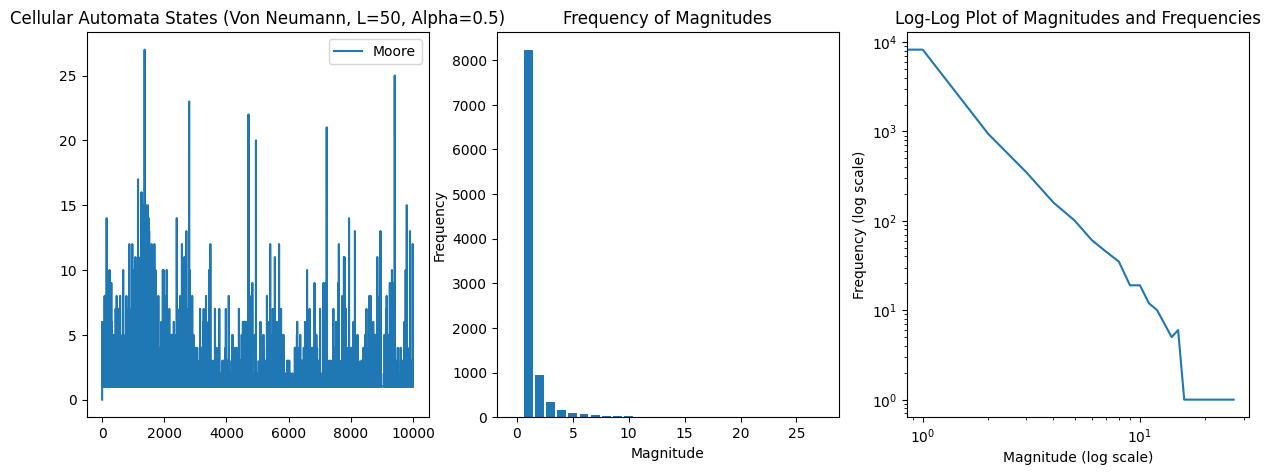

Counter({1: 3682, 2: 1798, 3: 878, 4: 515, 5: 345, 6: 253, 7: 205, 8: 183, 9: 140, 10: 115, 13: 101, 12: 91, 11: 71, 14: 69, 16: 56, 15: 51, 17: 48, 18: 47, 21: 35, 20: 35, 22: 31, 23: 30, 19: 28, 29: 25, 28: 23, 24: 23, 48: 21, 27: 21, 35: 20, 26: 20, 25: 19, 34: 18, 32: 17, 107: 17, 30: 16, 39: 16, 31: 16, 42: 15, 37: 15, 44: 14, 76: 14, 79: 14, 36: 13, 45: 13, 41: 13, 91: 13, 33: 12, 51: 12, 38: 12, 93: 11, 53: 10, 47: 10, 50: 10, 128: 10, 49: 10, 68: 9, 40: 9, 89: 9, 74: 8, 69: 8, 56: 8, 101: 8, 43: 8, 46: 7, 78: 7, 54: 7, 90: 7, 87: 7, 62: 7, 92: 7, 123: 7, 64: 7, 137: 7, 55: 6, 67: 6, 111: 6, 70: 6, 75: 6, 52: 6, 61: 6, 124: 6, 66: 6, 80: 5, 86: 5, 81: 5, 244: 5, 88: 5, 84: 5, 59: 5, 126: 5, 77: 5, 110: 5, 58: 4, 85: 4, 159: 4, 374: 4, 82: 4, 461: 4, 243: 4, 138: 4, 276: 4, 65: 3, 60: 3, 156: 3, 257: 3, 171: 3, 104: 3, 117: 3, 305: 3, 106: 3, 307: 3, 72: 3, 283: 3, 271: 3, 131: 3, 375: 3, 57: 3, 223: 3, 439: 3, 154: 3, 528: 3, 136: 3, 130: 3, 755: 3, 109: 3, 492: 3, 127: 3, 155: 

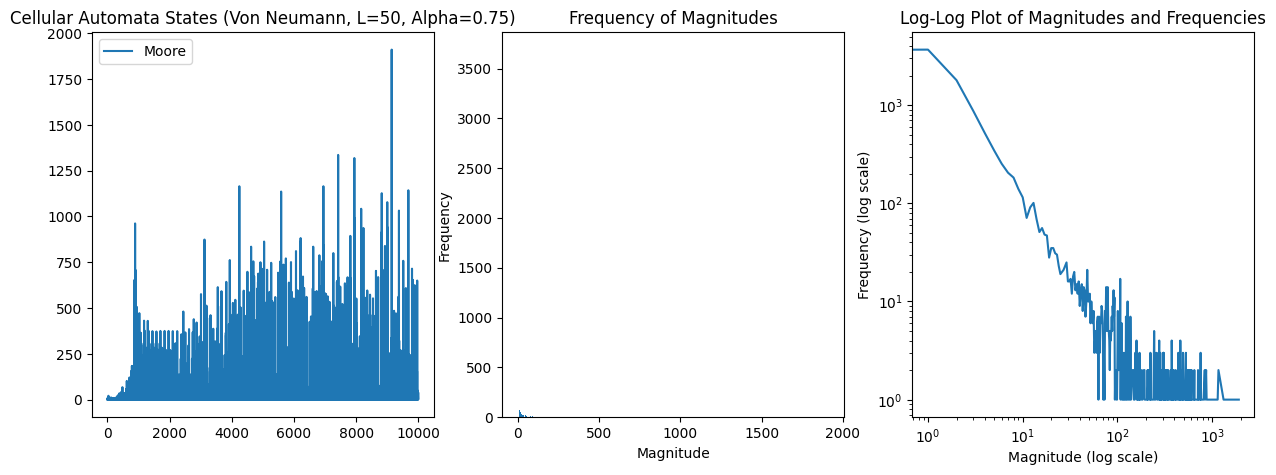

In [10]:
# for i, active_sites_von in enumerate(sites_von):
i = 0
for L in L_values:
    for alpha in alpha_values:
        active_sites_von = sites_von[i]
        i += 1
        plt.figure(figsize=(15, 5))
        plt.subplot(131)
        plt.plot(active_sites_von, label='Moore')
        from collections import Counter
        occurrences_counter = Counter(active_sites_von)
        print(occurrences_counter)
        plt.title(f"Cellular Automata States (Von Neumann, L={L}, Alpha={alpha})")
        plt.legend()

        plt.subplot(132)
        sorted_data = dict(sorted(occurrences_counter.items()))
        magnitudes = list(sorted_data.keys())
        frequencies = list(sorted_data.values())

        plt.bar(magnitudes, frequencies)
        plt.xlabel('Magnitude')
        plt.ylabel('Frequency')
        plt.title('Frequency of Magnitudes')

        plt.subplot(133)
        plt.loglog(magnitudes, frequencies)
        plt.xlabel('Magnitude (log scale)')
        plt.ylabel('Frequency (log scale)')
        plt.title('Log-Log Plot of Magnitudes and Frequencies')
        plt.show()

